<a target="_blank" href="https://colab.research.google.com/github/wbfrench1/stock/blob/main/src/get_stock_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# New Section

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
#from yahoofinance import HistoricalPrices
import json
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

# Plan

1. Pull one stocks data
1. Get Data over a specified period of time and interval
1. Graph stock data over time period
1. Get s&p500 stock tickers
1. Get Multiple Ticker Data

# Next Steps

1. Try different methods of getting multiple ticker data
1. find stocks that have dropped 40% or more in time period
 1. I am having trouble creating the dataframe for the high/low/cur
1. make a bag of functions

# Graph Historical Performance

### Pull one stocks data

In [2]:
msft = yf.Ticker("MSFT")
str_period = '5y'
str_interval = '1mo'

### Get Data over a specified period of time and interval

In [3]:
msft.history(period=str_period,
             interval=str_interval).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-08-01 00:00:00-04:00,100.282934,106.667069,99.157432,106.241463,456628100,0.42,0.0
2018-09-01 00:00:00-04:00,105.245134,109.460639,101.808176,108.587158,480255500,0.00,0.0
2018-10-01 00:00:00-04:00,108.947936,110.305632,95.048174,101.409401,927548000,0.00,0.0
2018-11-01 00:00:00-04:00,101.637275,106.564851,94.326603,105.283112,720228600,0.46,0.0
2018-12-01 00:00:00-05:00,107.749920,108.150404,89.594534,96.850967,944314600,0.00,0.0


### Graph stock data over time period

<Axes: xlabel='Date', ylabel='Close'>

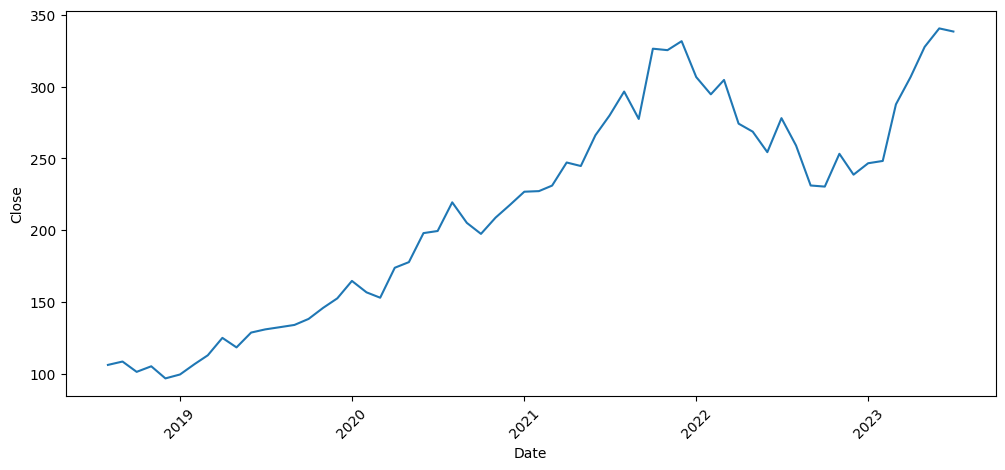

In [4]:
t_figsize = (12,5)
fig, ax = plt.subplots(figsize=t_figsize)
plt.xticks(rotation=45)
sns.lineplot(x= msft.history(period=str_period,
                             interval=str_interval).index,
             y= msft.history(period=str_period,
                             interval=str_interval)['Close'],
             ax= ax)

In [5]:
msft.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-29 00:00:00-04:00,334.709991,336.109985,332.619995,335.049988,16997000,0.0,0.0
2023-06-30 00:00:00-04:00,337.750000,342.730011,337.200012,340.540009,26823800,0.0,0.0
2023-07-03 00:00:00-04:00,339.190002,340.899994,336.570007,337.989990,12508700,0.0,0.0
2023-07-05 00:00:00-04:00,335.089996,341.649994,334.730011,338.149994,18172400,0.0,0.0
2023-07-06 00:00:00-04:00,337.299988,342.989990,335.500000,341.269989,28161200,0.0,0.0
2023-07-07 00:00:00-04:00,339.320007,341.790009,337.000000,337.220001,21185300,0.0,0.0
2023-07-10 00:00:00-04:00,334.600006,335.230011,327.589996,331.829987,32791400,0.0,0.0
2023-07-11 00:00:00-04:00,331.059998,332.859985,327.000000,332.470001,26698200,0.0,0.0
2023-07-12 00:00:00-04:00,336.600006,341.649994,335.670013,337.200012,29995300,0.0,0.0


# Get s&p500 stock tickers

In [6]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_sp500_co_info = table[0]
df_sp500_co_info.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [7]:
df_sp500_co_info['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

https://www.marketdata.app/how-to-use-the-yahoo-finance-api/

# Get Multiple Ticker Data

## Put S&P 500 tickers into a string

In [8]:
# If the below download fails, then it might be because of the replacement of . with -
str_sp500_stk_tkrs= ' '.join(i if '.' not in i else i.replace('.','-') for i in df_sp500_co_info['Symbol'])
print('Number of tickers in sp500:', len(df_sp500_co_info['Symbol']), '\n')
str_sp500_stk_tkrs

Number of tickers in sp500: 503 



'MMM AOS ABT ABBV ACN ATVI ADM ADBE ADP AAP AES AFL A APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AMD AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS AON APA AAPL AMAT APTV ACGL ANET AJG AIZ T ATO ADSK AZO AVB AVY AXON BKR BALL BAC BBWI BAX BDX WRB BRK-B BBY BIO TECH BIIB BLK BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF-B BG CHRW CDNS CZR CPT CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CDAY CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CEG COO CPRT GLW CTVA CSGP COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DIS DG DLTR D DPZ DOV DOW DTE DUK DD DXC EMN ETN EBAY ECL EIX EW EA ELV LLY EMR ENPH ETR EOG EPAM EQT EFX EQIX EQR ESS EL ETSY EG EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FICO FAST FRT FDX FITB FSLR FE FIS FI FLT FMC F FTNT FTV FOXA FOX BEN FCX GRMN IT GEHC GEN GNRC GD GE GIS GM GPC GILD GL GPN GS HAL HIG HAS HCA PEAK HSIC HSY HES HPE HLT HOLX HD HON HRL HST

## Query Multiple Tickers

In [9]:
str_today = datetime.today().strftime("%Y-%m-%d")

In [10]:
data = yf.download(str_sp500_stk_tkrs, start="2018-01-01", end=str_today)

[*********************100%***********************]  503 of 503 completed


In [11]:
print('data.shape:', data.shape)
data.tail(5)

data.shape: (1402, 3018)


Adj Close                                                \
                     A        AAL        AAP        AAPL        ABBV   
Date                                                                   
2023-07-24  127.720001  16.879999  72.760002  192.750000  143.179993   
2023-07-25  127.309998  16.650000  71.550003  193.619995  141.630005   
2023-07-26  128.470001  16.760000  73.089996  194.500000  141.899994   
2023-07-27  126.660004  16.570000  72.639999  193.220001  148.850006   
2023-07-28  126.050003  16.790001  73.169998  195.830002  150.850006   

                                                                       ...  \
                   ABC         ABT       ACGL         ACN        ADBE  ...   
Date                                                                   ...   
2023-07-24  191.449997  114.620003  81.190002  313.290009  523.859985  ...   
2023-07-25  191.889999  112.930000  81.360001  317.589996  525.340027  ...   
2023-07-26  187.710007  114.080002  82.080002  316.510010  514.549988  ...   
2023-07-27  187.330002  112.650002  79.669998  318.820007  513.969971  ...   
2023-07-28  186.559998  112.730003  77.250000  315.549988  528.869995  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2023-07-24  1595600  2837200  15090900  2204700  1264400  1148000  1466800   
2023-07-25  1270000  3247000  14116100  1099200  1205900   968500   842700   
2023-07-26  1003900  2529800  15159600  1402700  1131300  1758400   996600   
2023-07-27  1997800  4046300  17677900  1642600  1226600  1385100  1441600   
2023-07-28  1661300  4227300  17566400  1085500  1265500  1483400   997100   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2023-07-24  303900  4933100  2950200  
2023-07-25  320100  5271300  3952800  
2023-07-26  289100  4360700  2922500  
2023-07-27  493900  4411800  2173400  
2023-07-28  534100  2650400  1899800  

[5 rows x 3018 columns]

In [12]:
# convert the index to datetime
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20',
               '2023-07-21', '2023-07-24', '2023-07-25', '2023-07-26',
               '2023-07-27', '2023-07-28'],
              dtype='datetime64[ns]', name='Date', length=1402, freq=None)

In [13]:
#Get today's Date
ts_clst_day = data.index[data.index.get_indexer([datetime.today()], method='nearest')]
ts_clst_day

DatetimeIndex(['2023-07-28'], dtype='datetime64[ns]', name='Date', freq=None)

# Create Min/Max Current DataFrame

## Recent Adjusted Closing Price

In [14]:
df_cur_stkpr = data.loc[ts_clst_day, 'Adj Close'].stack().loc[ts_clst_day,:].copy()

In [15]:
df_cur_stkpr1 = df_cur_stkpr.loc[ts_clst_day].reset_index().drop(columns='Date').set_index('level_1')
df_cur_stkpr1
#df_cur_stkpr.loc['2023-07-07']
#ts_clst_day[0].strftime('YYYY-MM-DD')

,0
level_1,
A,126.050003
AAL,16.790001
AAP,73.169998
AAPL,195.830002
ABBV,150.850006
...,...
YUM,136.940002
ZBH,139.339996
ZBRA,299.179993


In [16]:
pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})

,Cur_StkPr
level_1,
A,126.050003
AAL,16.790001
AAP,73.169998
AAPL,195.830002
ABBV,150.850006
...,...
YUM,136.940002
ZBH,139.339996
ZBRA,299.179993


In [128]:
df = data.copy()
df.reset_index(inplace=True)
df.head()

Date  Adj Close                                               \
                      A        AAL         AAP       AAPL       ABBV   
0 2018-01-02  64.865402  51.647560   98.153381  40.831593  75.741013   
1 2018-01-03  66.515808  51.014023   99.041588  40.824474  76.926247   
2 2018-01-04  66.016838  51.335670  102.696091  41.014107  76.487556   
3 2018-01-05  67.072357  51.316177  103.787819  41.481060  77.819054   
4 2018-01-08  67.216301  50.809349  103.056900  41.326996  76.572227   

                                                ...   Volume           \
         ABC        ABT       ACGL         ACN  ...     WYNN      XEL   
0  86.158249  53.380829  29.433332  141.472946  ...  2581200  2443400   
1  86.478905  53.498863  29.459999  142.125885  ...  3530900  4114900   
2  86.286507  53.408077  29.570000  143.808777  ...  2708800  2807000   
3  87.330948  53.562424  29.453333  144.995056  ...  2186600  3728000   
4  88.778526  53.408077  29.456667  146.153809  ...  1803800  3837600   

                                                                          
        XOM     XRAY     XYL      YUM      ZBH    ZBRA     ZION      ZTS  
0  11469300  1622300  877800  1747800  1818259  310600  2387100  2135600  
1  13957700  1533300  778800  2554900  1368664  253000  1575700  2328200  
2  10863000  1052400  796500  1971200  1105396  435200  3309200  2534000  
3  11047600  1329000  666800  1927100  1095302  301800  1212200  2166100  
4  10927100  1188500  554700  1599400  1286985  218600  1697700  3631400  

[5 rows x 3019 columns]

In [129]:
df1 = df.copy()

In [130]:
df1.columns = [' '.join((col[0].replace(' ',''),col[1])).strip() for col in df1.columns.values]

In [131]:
df1.head(1)

,Date,AdjClose A,AdjClose AAL,AdjClose AAP,AdjClose AAPL,AdjClose ABBV,AdjClose ABC,AdjClose ABT,AdjClose ACGL,AdjClose ACN,...,Volume WYNN,Volume XEL,Volume XOM,Volume XRAY,Volume XYL,Volume YUM,Volume ZBH,Volume ZBRA,Volume ZION,Volume ZTS
0,2018-01-02,64.865402,51.64756,98.153381,40.831593,75.741013,86.158249,53.380829,29.433332,141.472946,...,2581200,2443400,11469300,1622300,877800,1747800,1818259,310600,2387100,2135600


In [160]:
df2 = df1.melt(id_vars=['Date'], value_vars=df1.columns[1:],).copy()

In [161]:
df2['Value_Type'] =  df2['variable'].str.split(' ').str[0]
df2['Stock_Tkr'] =  df2['variable'].str.split(' ').str[1]
df2.drop(columns=['variable'], inplace=True)

In [162]:
df2 = df2[['Date', 'Value_Type', 'Stock_Tkr', 'value']].copy()

In [163]:
df2.head()

,Date,Value_Type,Stock_Tkr,value
0,2018-01-02,AdjClose,A,64.865402
1,2018-01-03,AdjClose,A,66.515808
2,2018-01-04,AdjClose,A,66.016838
3,2018-01-05,AdjClose,A,67.072357
4,2018-01-08,AdjClose,A,67.216301


In [97]:
df.head(10)

Date  Adj Close                                               \
                      A        AAL         AAP       AAPL       ABBV   
0 2018-01-02  64.865402  51.647560   98.153381  40.831593  75.741013   
1 2018-01-03  66.515808  51.014023   99.041588  40.824474  76.926247   
2 2018-01-04  66.016838  51.335670  102.696091  41.014107  76.487556   
3 2018-01-05  67.072357  51.316177  103.787819  41.481060  77.819054   
4 2018-01-08  67.216301  50.809349  103.056900  41.326996  76.572227   
5 2018-01-09  68.866684  50.760616  102.224228  41.322258  77.149467   
6 2018-01-10  67.926331  52.417545  102.316734  41.312775  76.726158   
7 2018-01-11  67.935936  54.990658  104.500206  41.547440  76.950943   
8 2018-01-12  68.828323  56.988735  107.266510  41.976456  77.780388   
9 2018-01-16  68.348541  56.511147  105.379128  41.763130  79.447006   

                                                ...   Volume           \
         ABC        ABT       ACGL         ACN  ...     WYNN      XEL   
0  86.158249  53.380829  29.433332  141.472946  ...  2581200  2443400   
1  86.478905  53.498863  29.459999  142.125885  ...  3530900  4114900   
2  86.286507  53.408077  29.570000  143.808777  ...  2708800  2807000   
3  87.330948  53.562424  29.453333  144.995056  ...  2186600  3728000   
4  88.778526  53.408077  29.456667  146.153809  ...  1803800  3837600   
5  89.346581  53.498863  29.076668  146.641235  ...  2453600  3006300   
6  89.062561  53.417145  28.916668  146.126190  ...  2296800  2690000   
7  89.914619  53.782074  29.623333  146.319290  ...  2420700  3020900   
8  90.702515  53.681721  30.230000  147.238953  ...  2680200  3422600   
9  91.206459  53.316788  30.459999  145.261749  ...  3264400  4761900   

                                                                          
        XOM     XRAY     XYL      YUM      ZBH    ZBRA     ZION      ZTS  
0  11469300  1622300  877800  1747800  1818259  310600  2387100  2135600  
1  13957700  1533300  778800  2554900  1368664  253000  1575700  2328200  
2  10863000  1052400  796500  1971200  1105396  435200  3309200  2534000  
3  11047600  1329000  666800  1927100  1095302  301800  1212200  2166100  
4  10927100  1188500  554700  1599400  1286985  218600  1697700  3631400  
5   8131600  2678500  687600  1701000  2059176  355400  1888100  2721800  
6  10822300  4330500  784900   887100  2015401  403000  2790500  2257200  
7  14366000  6594900  880900  1352700  1343944  493200  1242800  1629300  
8   9834500  1667100  847700  1377300  1044832  420800  1634400  1915700  
9  10882800  1236100  940100  1391200  1438395  402100  1512100  2599100  

[10 rows x 3019 columns]

In [121]:
df.loc[df['Date'] == '2020-05-15']

Date  Adj Close                                                    \
                        A   AAL         AAP      AAPL       ABBV        ABC   
596 2020-05-15  79.892403  9.04  117.335686  75.52755  78.830139  82.235764   

                                   ...   Volume                              \
           ABT   ACGL         ACN  ...     WYNN      XEL       XOM     XRAY   
596  85.209892  22.98  175.784576  ...  3885000  5744300  22445600  5570700   

                                                        
        XYL      YUM     ZBH    ZBRA     ZION      ZTS  
596  985200  3998200  881371  383100  2205200  2921700  

[1 rows x 3019 columns]

In [114]:
# The idea here is to find the index of the min/max values to facilitate
# getting the date of the min/max
pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmin().values]),
             columns=['5Yr_StkPr_Low_Date'], index=data['Adj Close'].columns)

,5Yr_StkPr_Low_Date
A,2018-06-27
AAL,2020-05-15
AAP,2023-06-09
AAPL,2019-01-03
ABBV,2019-08-15
...,...
YUM,2020-03-23
ZBH,2020-03-18
ZBRA,2018-01-02
ZION,2023-05-04


In [124]:
# Show period low, high, current
df_min_max = pd.concat([pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmin().values]),
             columns=['5Yr_StkPr_Low_Date'], index=data['Adj Close'].columns),
                        pd.DataFrame(data['Adj Close'].min(),
                        columns=['5Yr_StkPr_Low']
                        ),
                        pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmax().values]),
                                     columns=['5Yr_StkPr_High_Date'],
                                     index=data['Adj Close'].columns),
                        pd.DataFrame(data['Adj Close'].max(),
                                     columns=['5Yr_StkPr_High']),
                        pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})], axis=1)
df_min_max.head()

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr
A,2018-06-27,58.797665,2021-09-03,177.025665,126.050003
AAL,2020-05-15,9.040000,2018-01-12,56.988735,16.790001
AAP,2023-06-09,63.355339,2022-01-06,229.554688,73.169998
AAPL,2019-01-03,34.209965,2023-07-28,195.830002,195.830002
ABBV,2019-08-15,52.443920,2022-04-08,165.176773,150.850006


## Add Company Names

In [ ]:
df_min_max_cur= df_min_max.merge(df_sp500_co_info[['Symbol',
                                               'Security']],
                             how='left', left_index= True,
                             right_on='Symbol').copy()
df_min_max_cur.head()

In [ ]:
df_min_max_cur = df_min_max_cur.reset_index().drop(columns='index').copy()
df_min_max_cur

In [ ]:
df_min_max_cur= df_min_max_cur[['Symbol', 'Security','5Yr_StkPr_Low',
                                '5Yr_StkPr_High', 'Cur_StkPr']].copy()

# Find % Decline from High

In [ ]:
df_min_max_cur['Pct_Chg_f_High'] = ((df_min_max_cur['Cur_StkPr']
                                    - df_min_max_cur['5Yr_StkPr_High']
                                    )
                                     /df_min_max_cur['5Yr_StkPr_High']
                                    )
df_min_max_cur

In [ ]:
threshold = -.5

In [ ]:
# try to add the dates that the low and high prices were reached
print(df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].shape, '\n')
df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].sort_values(by='Pct_Chg_f_High')